***DIGITAL-CHALLENGE -  A/B TEST***

***The aim of this project is to explore the impact of a new, more intuitive user interface (UI) with contextual messages on user experience and completion rates.*** 

We are analyzing data from an A/B test conducted by Vanguard, a U.S. asset management company. 

Our goal is to determine whether the new UI enhances user experience and leads to higher completion rates.

## Overview 

### Data cleaning and preparation:

Merging multiple data sets and removing duplicates.

Dealing with missing values by filling in with median or mode.

Ensuring data consistency and integrity.

### Dataset's:

Client Profiles (df_final_demo): This dataset includes customer details.

Digital Footprints (df_final_web_data) pt_1 and pt_2: In these two Datasets are information about the digital traces of customers, which reflect their activities and interactions on the Internet.

Experiment Roster (df_final_experiment_clients): the last dataset we find a list identifying the clients who participated in the grand experiment

Combined to Clean_Data

### Exploratory data analysis (EDA):

Analyzing user demographic characteristics, such as age and gender.

Examination of user behavior, including the number of logins and calls in the last six months.

Visualization of the distribution of users by age, gender, login and call frequency.

### Hypothesis tests:

Completion rates: Investigating whether there is a significant difference in completion rates between the control and test groups.

### Dwell time: 

Analysis of whether the new UI has influenced the time users spend on the individual process steps.

### Error rates: Examining whether the new UI has led to a reduction in error rates.

Conclusions and recommendations:

Summary of the results of the analyses.
Recommendations for future improvements based on the findings.

Implort Libaries

In [2]:
import pandas as pd
import seaborn as sns
import seaborn as sns
from scipy.stats import chi2_contingency, mannwhitneyu

## Load data

In [87]:
#Digital footprints # Read data

file_final_demo =r'C:\Users\User\Documents\IRON HACK DA 2024\Project Digital Challenge\New folder\Digital-challenege\DATA\raw\df_final_demo.txt'
file_experiment_clients =r'C:\Users\User\Documents\IRON HACK DA 2024\Project Digital Challenge\New folder\Digital-challenege\DATA\raw\df_final_experiment_clients.txt'



In [88]:
file_path_1= r'C:\Users\User\Documents\IRON HACK DA 2024\Project Digital Challenge\New folder\Digital-challenege\DATA\raw\df_final_web_data_pt_1.txt'
file_path_2= r'C:\Users\User\Documents\IRON HACK DA 2024\Project Digital Challenge\New folder\Digital-challenege\DATA\raw\df_final_web_data_pt_2.txt'


Inspect the datasets:   Check for missing values, data types, and basic statistics.

In [89]:
pd.read_csv(file_final_demo, sep=",")

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0
...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0


In [90]:
df_final_demo = pd.read_csv(file_final_demo, sep=",")
df_final_experiment_clients= pd.read_csv(file_experiment_clients, sep=",")

Merge Digital Footprints.

Combine the two parts of the digital footprints dataset.

In [91]:
df1=pd.read_csv(r"C:\Users\User\Documents\IRON HACK DA 2024\Project Digital Challenge\New folder\Digital-challenege\DATA\raw\df_final_web_data_pt_1.txt")
df2=pd.read_csv(r"C:\Users\User\Documents\IRON HACK DA 2024\Project Digital Challenge\New folder\Digital-challenege\DATA\raw\df_final_web_data_pt_2.txt")

In [92]:
#combined the data
df_combined = pd.concat([df1, df2])

In [93]:
df_combined

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
412259,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
412260,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
412261,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
412262,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


 ## Exploring the data & Clean the Data
Handle missing values, outliers, and any inconsistencies in the data.

In [94]:
df_final_demo.head()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0


In [95]:
df_final_experiment_clients.head()

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control


In [96]:
df_combined.head()

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04


In [97]:
# Check for missing values
print(df_final_demo.isnull().sum())
print(df_combined.isnull().sum())
print(df_final_experiment_clients.isnull().sum())

client_id            0
clnt_tenure_yr      14
clnt_tenure_mnth    14
clnt_age            15
gendr               14
num_accts           14
bal                 14
calls_6_mnth        14
logons_6_mnth       14
dtype: int64
client_id       0
visitor_id      0
visit_id        0
process_step    0
date_time       0
dtype: int64
client_id        0
Variation    20109
dtype: int64


In [98]:
# Handle missing values (e.g., fill, drop, or impute)
df_demo = df_final_demo.dropna()  # Example: drop rows with missing values
df_web_data = df_combined.fillna(method='ffill')  # Example: forward fill missing values
df_experiment = df_final_experiment_clients.dropna()  # Example: drop rows with missing values

In [99]:
# Check for duplicates
print(df_final_demo.duplicated().sum())
print(df_combined.duplicated().sum())
print(df_final_experiment_clients.duplicated().sum())

0
10764
0


In [16]:

# Remove duplicates if any
df_demo = df_final_demo.drop_duplicates()
df_web_data = df_combined.drop_duplicates()
df_experiment = df_final_experiment_clients.drop_duplicates()

In [100]:
# Checking shape of dataframes
print(df_final_demo.shape)
print(df_combined.shape)
print(df_final_experiment_clients.shape)


(70609, 9)
(755405, 5)
(70609, 2)


## Basic statistics

In [103]:
print(df_demo.describe())

          client_id  clnt_tenure_yr  clnt_tenure_mnth      clnt_age  \
count  7.059400e+04    70594.000000      70594.000000  70594.000000   
mean   5.005026e+06       12.053007        150.659999     46.442240   
std    2.877289e+06        6.871850         82.090264     15.591273   
min    1.690000e+02        2.000000         33.000000     13.500000   
25%    2.519543e+06        6.000000         82.000000     32.500000   
50%    5.016974e+06       11.000000        136.000000     47.000000   
75%    7.483074e+06       16.000000        192.000000     59.000000   
max    9.999839e+06       62.000000        749.000000     96.000000   

          num_accts           bal  calls_6_mnth  logons_6_mnth  
count  70594.000000  7.059400e+04  70594.000000   70594.000000  
mean       2.255532  1.474467e+05      3.382469       5.566720  
std        0.535000  3.015106e+05      2.236595       2.353296  
min        1.000000  1.378942e+04      0.000000       1.000000  
25%        2.000000  3.734660e+04  

In [104]:
print(df_web_data.describe())

          client_id
count  7.554050e+05
mean   5.013632e+06
std    2.879152e+06
min    1.690000e+02
25%    2.519882e+06
50%    5.033441e+06
75%    7.496063e+06
max    9.999875e+06


In [105]:
print(df_experiment.describe())

          client_id
count  5.050000e+04
mean   5.006179e+06
std    2.877443e+06
min    5.550000e+02
25%    2.515646e+06
50%    5.025104e+06
75%    7.477933e+06
max    9.999832e+06


In [106]:
print(df_demo.columns)


Index(['client_id', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age', 'gendr',
       'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth'],
      dtype='object')


In [107]:
print(df_demo.columns)


Index(['client_id', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age', 'gendr',
       'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth'],
      dtype='object')


In [108]:
# Verify column names
print("Column Names:", df_final_demo.columns)

Column Names: Index(['client_id', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age', 'gendr',
       'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth'],
      dtype='object')


In [109]:
# Inspect the first few rows
print("First Few Rows:")
print(df_final_demo.head())

First Few Rows:
   client_id  clnt_tenure_yr  clnt_tenure_mnth  clnt_age gendr  num_accts  \
0     836976             6.0              73.0      60.5     U        2.0   
1    2304905             7.0              94.0      58.0     U        2.0   
2    1439522             5.0              64.0      32.0     U        2.0   
3    1562045            16.0             198.0      49.0     M        2.0   
4    5126305            12.0             145.0      33.0     F        2.0   

         bal  calls_6_mnth  logons_6_mnth  
0   45105.30           6.0            9.0  
1  110860.30           6.0            9.0  
2   52467.79           6.0            9.0  
3   67454.65           3.0            6.0  
4  103671.75           0.0            3.0  


In [110]:
df_demo

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0
...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0


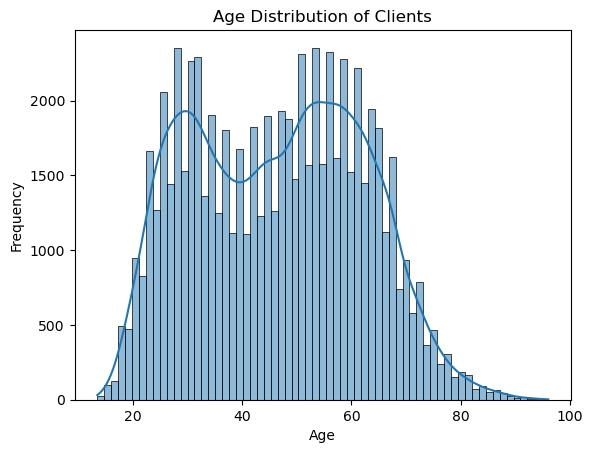

In [111]:

# Check for the presence of the 'clnt_age' column and plot
if 'clnt_age' in df_final_demo.columns:
    sns.histplot(df_final_demo['clnt_age'], kde=True)
    plt.title('Age Distribution of Clients')
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    plt.show()
else:
    print("The 'clnt_age' column does not exist in the DataFrame.")

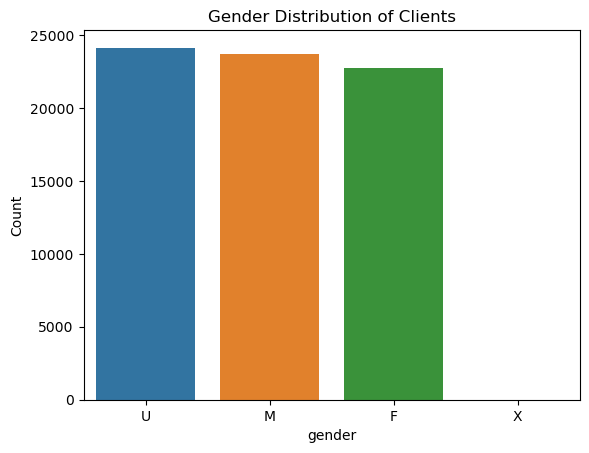

In [112]:
# Gender distribution
sns.countplot(x='gendr', data=df_demo)
plt.title('Gender Distribution of Clients')
plt.xlabel('gender')
plt.ylabel('Count')
plt.show()


In [113]:
df_web_data

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
412259,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
412260,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
412261,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
412262,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [114]:
df_experiment

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control
...,...,...
50495,393005,Control
50496,2908510,Control
50497,7230446,Test
50498,5230357,Test


In [115]:
df_demo

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0
...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0


In [116]:


# Sample DataFrame
data = {
    'Category': ['A', 'B', 'A', 'B', 'A', 'B'],
    'Value': [10, 20, 15, 30, 10, 25]
}
df = pd.DataFrame(data)

# Summary statistics
summary_stats = df.describe()
print(summary_stats)


           Value
count   6.000000
mean   18.333333
std     8.164966
min    10.000000
25%    11.250000
50%    17.500000
75%    23.750000
max    30.000000


In [117]:
# Group by 'Category' and calculate the mean and sum of 'Value'
grouped_summary = df.groupby('Category').agg({'Value': ['mean', 'sum']})
print(grouped_summary)


              Value    
               mean sum
Category               
A         11.666667  35
B         25.000000  75


In [33]:
# Pivot table to summarize data
pivot_table = pd.pivot_table(df, values='Value', index='Category', aggfunc=['mean', 'sum'])
print(pivot_table)


               mean   sum
              Value Value
Category                 
A         11.666667    35
B         25.000000    75


In [34]:
# Custom summary function
def custom_summary(group):
    return pd.Series({
        'Count': group.count(),
        'Sum': group.sum(),
        'Mean': group.mean()
    })

custom_summary_table = df.groupby('Category')['Value'].apply(custom_summary).unstack()
print(custom_summary_table)


          Count   Sum       Mean
Category                        
A           3.0  35.0  11.666667
B           3.0  75.0  25.000000


In [118]:
from IPython.display import display

# Displaying the summaries
display(summary_stats)
display(grouped_summary)
display(pivot_table)
display(custom_summary_table)


,Value
count,6.000000
mean,18.333333
std,8.164966
min,10.000000
25%,11.250000
50%,17.500000
75%,23.750000
max,30.000000


Value    
               mean sum
Category               
A         11.666667  35
B         25.000000  75

,mean,sum
,Value,Value
Category,,
A,11.666667,35
B,25.000000,75


,Count,Sum,Mean
Category,,,
A,3.0,35.0,11.666667
B,3.0,75.0,25.000000



## Week 5, Day 1 & 2: EDA & Data Cleaning

For the project requirements and instructions for today’s tasks in full, please refer to the project brief. However, in order to keep on track you may refer to the daily goals outlined below:

By the end of the first two days, we recommend you have:

Done dataset discovery: Understood the nature and structure of your datasets using Python with libraries such as Pandas, Matplotlib, and Seaborn.

Carried out data cleaning and fix any problems if there are any.

Answered the following questions about demographics:

Who are the primary clients using this online process?
Are the primary clients younger or older, new or long-standing?

Carried out a client behaviour analysis to answer any additional relevant questions you think are important.

## Merge Data:

In [120]:
df_demo
df_web_data
df_experiment

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control
...,...,...
50495,393005,Control
50496,2908510,Control
50497,7230446,Test
50498,5230357,Test


In [121]:
df_merged = df_web_data.merge(df_demo, on='client_id', how='left').merge(df_experiment, on='client_id', how='left')

# Initial Inspection:

In [122]:
print(df_merged.head())

   client_id            visitor_id                      visit_id process_step  \
0    9988021  580560515_7732621733  781255054_21935453173_531117       step_3   
1    9988021  580560515_7732621733  781255054_21935453173_531117       step_2   
2    9988021  580560515_7732621733  781255054_21935453173_531117       step_3   
3    9988021  580560515_7732621733  781255054_21935453173_531117       step_2   
4    9988021  580560515_7732621733  781255054_21935453173_531117       step_3   

             date_time  clnt_tenure_yr  clnt_tenure_mnth  clnt_age gendr  \
0  2017-04-17 15:27:07             5.0              64.0      79.0     U   
1  2017-04-17 15:26:51             5.0              64.0      79.0     U   
2  2017-04-17 15:19:22             5.0              64.0      79.0     U   
3  2017-04-17 15:19:13             5.0              64.0      79.0     U   
4  2017-04-17 15:18:04             5.0              64.0      79.0     U   

   num_accts        bal  calls_6_mnth  logons_6_mnth Var

In [123]:
print(df_merged.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 755405 entries, 0 to 755404
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   client_id         755405 non-null  int64  
 1   visitor_id        755405 non-null  object 
 2   visit_id          755405 non-null  object 
 3   process_step      755405 non-null  object 
 4   date_time         755405 non-null  object 
 5   clnt_tenure_yr    449704 non-null  float64
 6   clnt_tenure_mnth  449704 non-null  float64
 7   clnt_age          449704 non-null  float64
 8   gendr             449704 non-null  object 
 9   num_accts         449704 non-null  float64
 10  bal               449704 non-null  float64
 11  calls_6_mnth      449704 non-null  float64
 12  logons_6_mnth     449704 non-null  float64
 13  Variation         321309 non-null  object 
dtypes: float64(7), int64(1), object(6)
memory usage: 86.4+ MB
None


In [124]:
print(df_merged.describe())

          client_id  clnt_tenure_yr  clnt_tenure_mnth       clnt_age  \
count  7.554050e+05   449704.000000     449704.000000  449704.000000   
mean   5.013632e+06       12.234243        152.812170      47.653966   
std    2.879152e+06        7.005242         83.720383      15.742089   
min    1.690000e+02        2.000000         33.000000      13.500000   
25%    2.519882e+06        6.000000         82.000000      33.500000   
50%    5.033441e+06       11.000000        139.000000      49.000000   
75%    7.496063e+06       16.000000        194.000000      60.000000   
max    9.999875e+06       62.000000        749.000000      96.000000   

           num_accts           bal   calls_6_mnth  logons_6_mnth  
count  449704.000000  4.497040e+05  449704.000000  449704.000000  
mean        2.264774  1.597768e+05       3.529164       5.709842  
std         0.543080  3.420734e+05       2.242500       2.356200  
min         1.000000  1.378942e+04       0.000000       1.000000  
25%         2.00

# Data Cleaning:

Missing Values:

In [125]:
#  Handle missing values appropriately
df_merged.isnull().sum()



client_id                0
visitor_id               0
visit_id                 0
process_step             0
date_time                0
clnt_tenure_yr      305701
clnt_tenure_mnth    305701
clnt_age            305701
gendr               305701
num_accts           305701
bal                 305701
calls_6_mnth        305701
logons_6_mnth       305701
Variation           434096
dtype: int64

Check for Duplicates:

In [126]:
# Duplicates

df_merged =df_merged.drop_duplicates()


In [127]:
# Data Types : # Convert other columns if necessary
df_merged['date_time'] = pd.to_datetime(df_merged['date_time'])



Ensure Correct Data Types:

In [128]:

df_merged['date_time'] = pd.to_numeric(df_merged['date_time'], errors='coerce')


Check Data Types:

In [130]:
print(df_merged.dtypes)


client_id             int64
visitor_id           object
visit_id             object
process_step         object
date_time             int64
clnt_tenure_yr      float64
clnt_tenure_mnth    float64
clnt_age            float64
gendr                object
num_accts           float64
bal                 float64
calls_6_mnth        float64
logons_6_mnth       float64
Variation            object
dtype: object


In [131]:
df_merged

,client_id,visitor_id,visit_id,process_step,date_time,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,1492442827000000000,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0,Test
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,1492442811000000000,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0,Test
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,1492442362000000000,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0,Test
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,1492442353000000000,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0,Test
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,1492442284000000000,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0,Test
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755400,9668240,388766751_9038881013,922267647_3096648104_968866,start,1495651570000000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
755401,9668240,388766751_9038881013,922267647_3096648104_968866,start,1495651529000000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
755402,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,1495651491000000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
755403,9668240,388766751_9038881013,922267647_3096648104_968866,start,1495651474000000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##  Demographics Analysis

1 Who are the primary clients using this online process?



# Visualize Distributions:

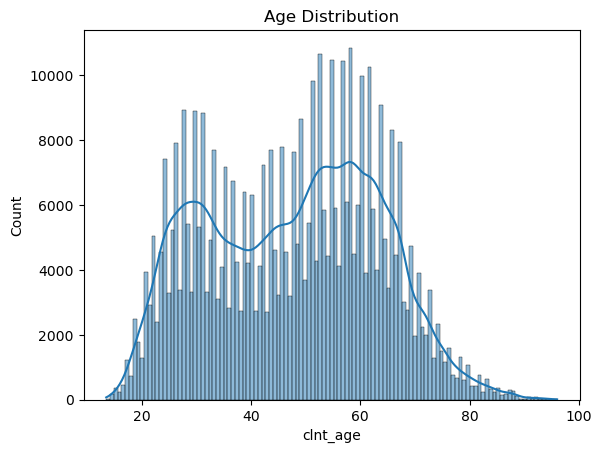

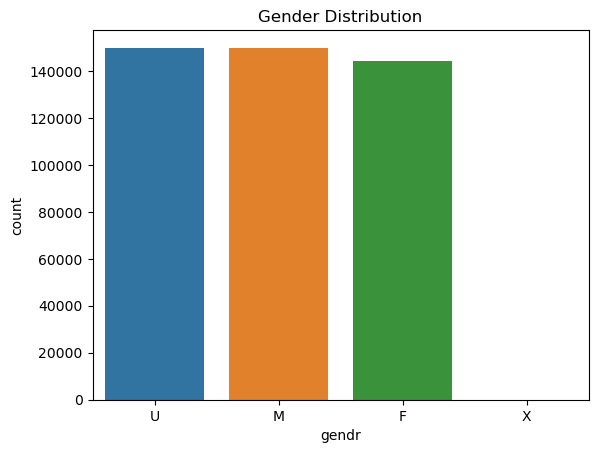

In [132]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df_merged['clnt_age'], kde=True)
plt.title('Age Distribution')
plt.show()

sns.countplot(x='gendr', data=df_merged)
plt.title('Gender Distribution')
plt.show()


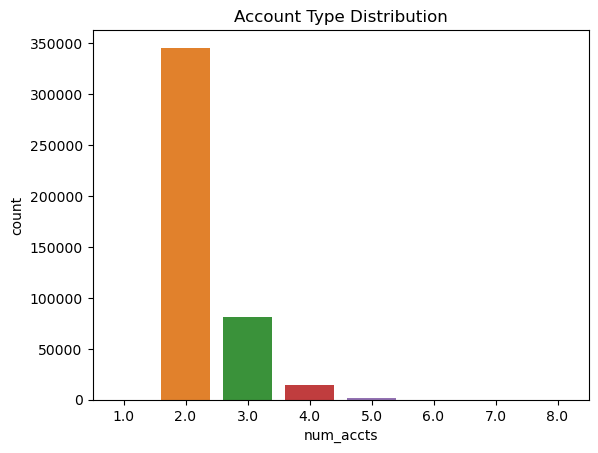

In [133]:

# Account type distribution
sns.countplot(x='num_accts', data=df_merged)
plt.title('Account Type Distribution')
plt.show()

2 Are the primary clients younger or older, new or long-standing?

In [134]:
# Age groups: younger vs older
younger_clients = df_merged[df_merged['clnt_age'] < df_merged['clnt_age'].median()]
older_clients = df_merged[df_merged['clnt_age'] >= df_merged['clnt_age'].median()]



In [135]:
print (younger_clients)

        client_id             visitor_id                      visit_id  \
8         8320017   39393514_33118319366  960651974_70596002104_312201   
9         8320017   39393514_33118319366  960651974_70596002104_312201   
10        8320017   39393514_33118319366  960651974_70596002104_312201   
11        8320017   39393514_33118319366  960651974_70596002104_312201   
12        8320017   39393514_33118319366  960651974_70596002104_312201   
...           ...                    ...                           ...   
755323    1020453  433909361_21130313633  310496685_94413045985_207142   
755324    1020453  433909361_21130313633  310496685_94413045985_207142   
755325    1020453  433909361_21130313633  310496685_94413045985_207142   
755326    1020453  433909361_21130313633  310496685_94413045985_207142   
755357    3897324   80177429_24869309091  149796456_64325617570_112561   

       process_step            date_time  clnt_tenure_yr  clnt_tenure_mnth  \
8           confirm  149139780500

In [136]:
print(older_clients)

        client_id             visitor_id                      visit_id  \
0         9988021   580560515_7732621733  781255054_21935453173_531117   
1         9988021   580560515_7732621733  781255054_21935453173_531117   
2         9988021   580560515_7732621733  781255054_21935453173_531117   
3         9988021   580560515_7732621733  781255054_21935453173_531117   
4         9988021   580560515_7732621733  781255054_21935453173_531117   
...           ...                    ...                           ...   
755377    9895983  473024645_56027518531  498981662_93503779869_272484   
755378    9895983  473024645_56027518531  498981662_93503779869_272484   
755379    9895983  473024645_56027518531  498981662_93503779869_272484   
755380    9895983  473024645_56027518531  498981662_93503779869_272484   
755381    9895983  473024645_56027518531  498981662_93503779869_272484   

       process_step            date_time  clnt_tenure_yr  clnt_tenure_mnth  \
0            step_3  149244282700

In [137]:
# New vs long-standing clients
new_clients = df_merged[df_merged['clnt_age'] < df_merged['clnt_age'].median()]
long_standing_clients = df_merged[df_merged['clnt_age'] >= df_merged['clnt_age'].median()]

In [138]:
print(new_clients)

        client_id             visitor_id                      visit_id  \
8         8320017   39393514_33118319366  960651974_70596002104_312201   
9         8320017   39393514_33118319366  960651974_70596002104_312201   
10        8320017   39393514_33118319366  960651974_70596002104_312201   
11        8320017   39393514_33118319366  960651974_70596002104_312201   
12        8320017   39393514_33118319366  960651974_70596002104_312201   
...           ...                    ...                           ...   
755323    1020453  433909361_21130313633  310496685_94413045985_207142   
755324    1020453  433909361_21130313633  310496685_94413045985_207142   
755325    1020453  433909361_21130313633  310496685_94413045985_207142   
755326    1020453  433909361_21130313633  310496685_94413045985_207142   
755357    3897324   80177429_24869309091  149796456_64325617570_112561   

       process_step            date_time  clnt_tenure_yr  clnt_tenure_mnth  \
8           confirm  149139780500

In [139]:
print(long_standing_clients)

        client_id             visitor_id                      visit_id  \
0         9988021   580560515_7732621733  781255054_21935453173_531117   
1         9988021   580560515_7732621733  781255054_21935453173_531117   
2         9988021   580560515_7732621733  781255054_21935453173_531117   
3         9988021   580560515_7732621733  781255054_21935453173_531117   
4         9988021   580560515_7732621733  781255054_21935453173_531117   
...           ...                    ...                           ...   
755377    9895983  473024645_56027518531  498981662_93503779869_272484   
755378    9895983  473024645_56027518531  498981662_93503779869_272484   
755379    9895983  473024645_56027518531  498981662_93503779869_272484   
755380    9895983  473024645_56027518531  498981662_93503779869_272484   
755381    9895983  473024645_56027518531  498981662_93503779869_272484   

       process_step            date_time  clnt_tenure_yr  clnt_tenure_mnth  \
0            step_3  149244282700

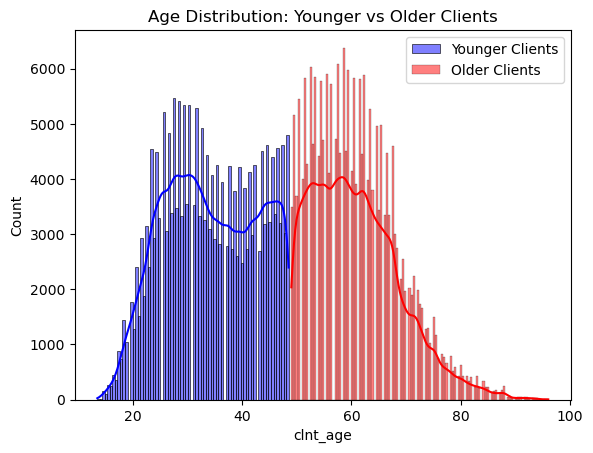

In [140]:
sns.histplot(younger_clients['clnt_age'], kde=True, color='blue', label='Younger Clients')
sns.histplot(older_clients['clnt_age'], kde=True, color='red', label='Older Clients')
plt.title('Age Distribution: Younger vs Older Clients')
plt.legend()
plt.show()

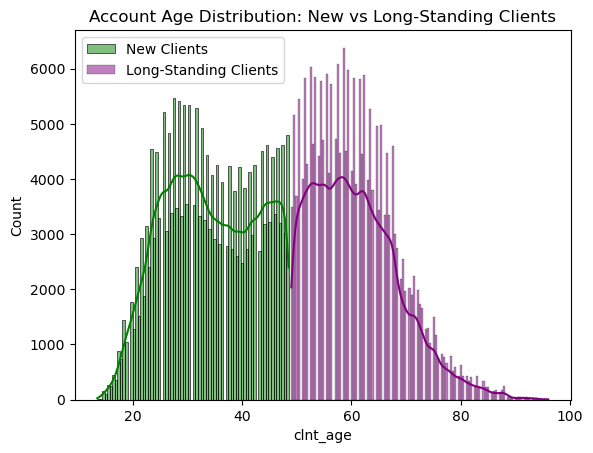

In [141]:
sns.histplot(new_clients['clnt_age'], kde=True, color='green', label='New Clients')
sns.histplot(long_standing_clients['clnt_age'], kde=True, color='purple', label='Long-Standing Clients')
plt.title('Account Age Distribution: New vs Long-Standing Clients')
plt.legend()
plt.show()

 # Gender distribution of customers

**Gender:** 

The gender distribution is fairly evenly split between “M” (male) and “F” (female), but there are also a significant number of “U” (unknown) and few “X” (unspecified). This indicates that the system may not always correctly record the gender of users.
Membership duration: Most customers have a membership duration of 5 to 15 years, with peaks at around 6 and 12 years. This indicates that the primary customers are medium to long-term users of the service.

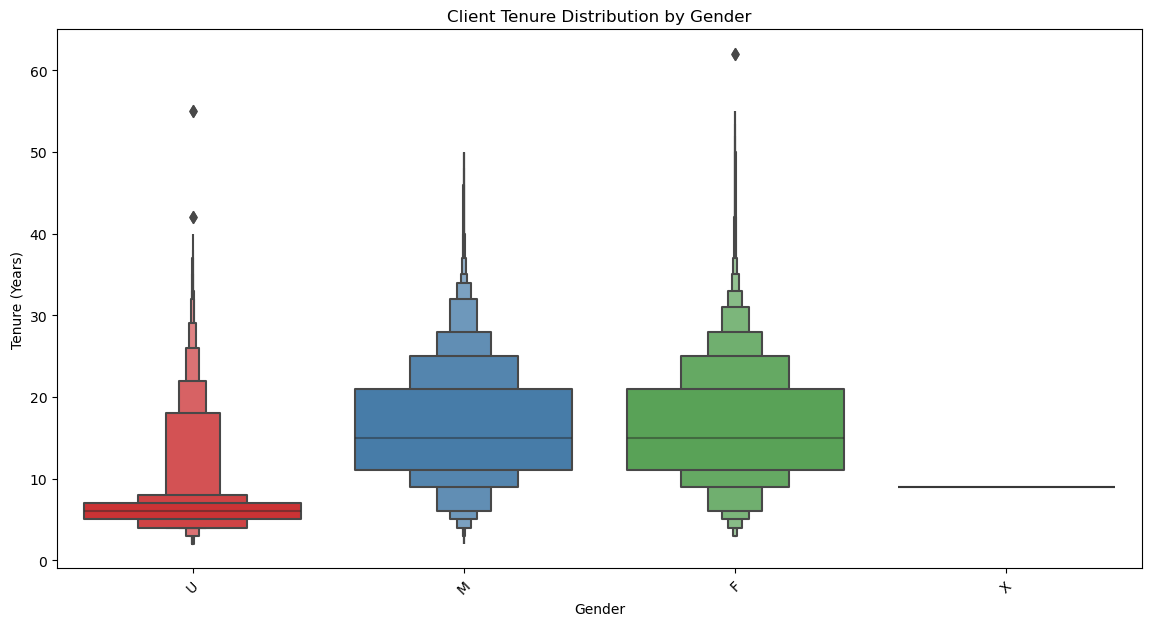

In [144]:
# Boxenplot for client gender
plt.figure(figsize=(14, 7))
sns.boxenplot(
    data=long_standing_clients, x="gendr", y="clnt_tenure_yr",
    palette='Set1'
)
plt.title('Client Tenure Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Tenure (Years)')
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.show()

# Distribution of customers by length of affiliation

***New or long-term:***

 Primary customers have a medium to long-term affiliation, as can be seen from the distribution of the length of affiliation.

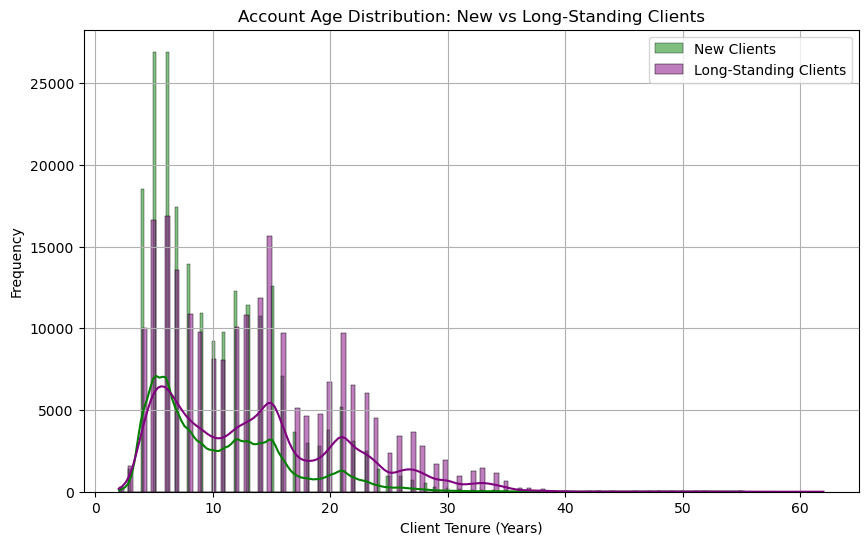

In [145]:
# Plotting the account age distribution for new vs long-standing clients
plt.figure(figsize=(10, 6))
sns.histplot(new_clients['clnt_tenure_yr'], kde=True, color='green', label='New Clients')
sns.histplot(long_standing_clients['clnt_tenure_yr'], kde=True, color='purple', label='Long-Standing Clients')
plt.title('Account Age Distribution: New vs Long-Standing Clients')
plt.xlabel('Client Tenure (Years)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()


In [142]:
df_Merged = df_merged.merge(df_demo, on='client_id', how='left').merge(df_experiment, on='client_id', how='left')

## Client Behavior Analysis

Interaction Patterns:

The distribution of logins shows that most customers have logged in between 1 and 9 times in the last 6 months, with a clear peak at 9 logins. This indicates that most customers use the platform regularly, but not excessively often.

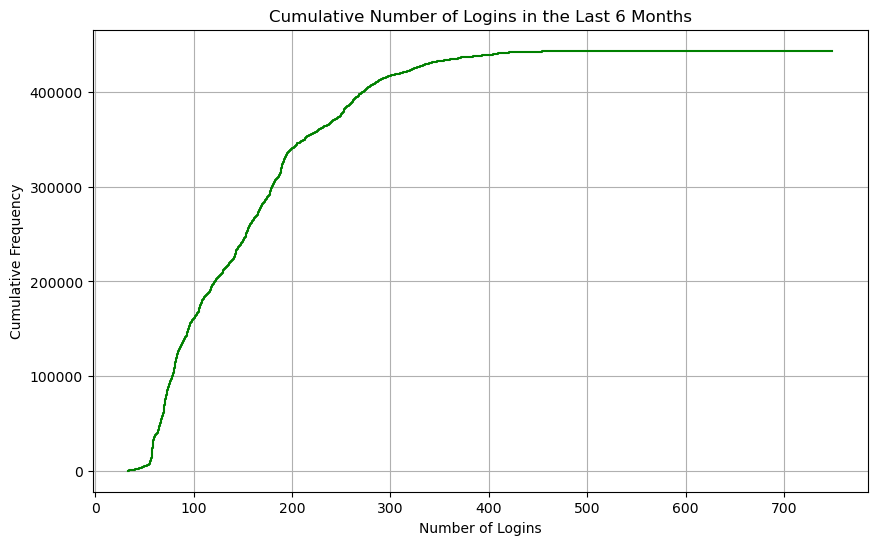

In [153]:
# Data for the step plot
logins = df_Merged['clnt_tenure_mnth_x'].value_counts().sort_index()
cumulative_logins = logins.cumsum()

# Plotting the step plot
plt.figure(figsize=(10, 6))
plt.step(cumulative_logins.index, cumulative_logins, where='mid', color='green')
plt.title('Cumulative Number of Logins in the Last 6 Months')
plt.xlabel('Number of Logins')
plt.ylabel('Cumulative Frequency')
plt.grid(True)
plt.show()

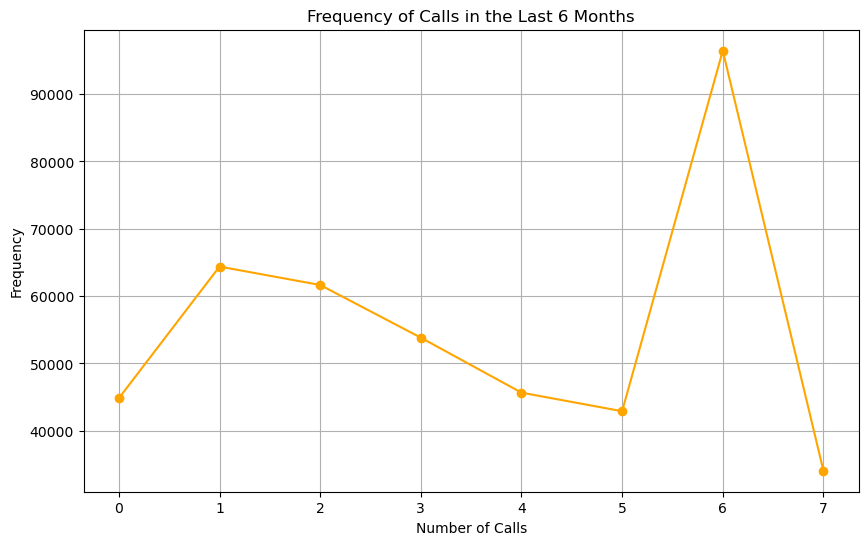

In [154]:
calls = df_Merged['calls_6_mnth_x'].value_counts().sort_index()

# Plotting the time series-like plot (or trend plot)
plt.figure(figsize=(10, 6))
plt.plot(calls.index, calls, marker='o', color='orange')
plt.title('Frequency of Calls in the Last 6 Months')
plt.xlabel('Number of Calls')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [164]:
print(df_merged.columns)

Index(['client_id', 'visitor_id', 'visit_id', 'process_step', 'date_time',
       'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age', 'gendr', 'num_accts',
       'bal', 'calls_6_mnth', 'logons_6_mnth', 'Variation'],
      dtype='object')


## Day 3 (Week 5): KPIs & Metrics


## Hypothesis 


# 1 Completion Rate
To test if the difference in completion rate between the test and control groups is statistically significant, we can use a two-proportion z-test.

Null Hypothesis (H0): The completion rate for the control group is equal to the completion rate for the test group.
Alternative Hypothesis (H1): The completion rate for the control group is not equal to the completion rate for the test group.

# 2 Completion Rate with a Cost-Effectiveness Threshold
To test if the observed increase in completion rate from the A/B test meets or exceeds the 5% threshold, we can again use a two-proportion z-test but with a specific threshold.

Null Hypothesis (H0): The completion rate for the test group is less than or equal to the completion rate for the control group plus 5%.
Alternative Hypothesis (H1): The completion rate for the test group is greater than the completion rate for the control group plus 5%.



# 3 Other Hypothesis Example
Let's test whether the average age of clients engaging with the new process is the same as those engaging with the old process using a two-sample t-test.

Null Hypothesis (H0): The average age of clients is the same for the control and test groups.
Alternative Hypothesis (H1): The average age of clients is different for the control and test groups.







Tasks:

Review KPIs and Metrics:

Understand the concepts and importance of KPIs and metrics in evaluating performance.
Identify Success Indicators:

Define KPIs like completion rate, time spent on each step, and error rates.
Identify any additional relevant KPIs.
Redesign Outcome:

Analyze the data to determine if the new design improves the KPIs.

In [180]:
print(df_merged.columns)


Index(['client_id', 'visitor_id', 'visit_id', 'process_step', 'date_time',
       'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age', 'gendr', 'num_accts',
       'bal', 'calls_6_mnth', 'logons_6_mnth', 'Variation'],
      dtype='object')


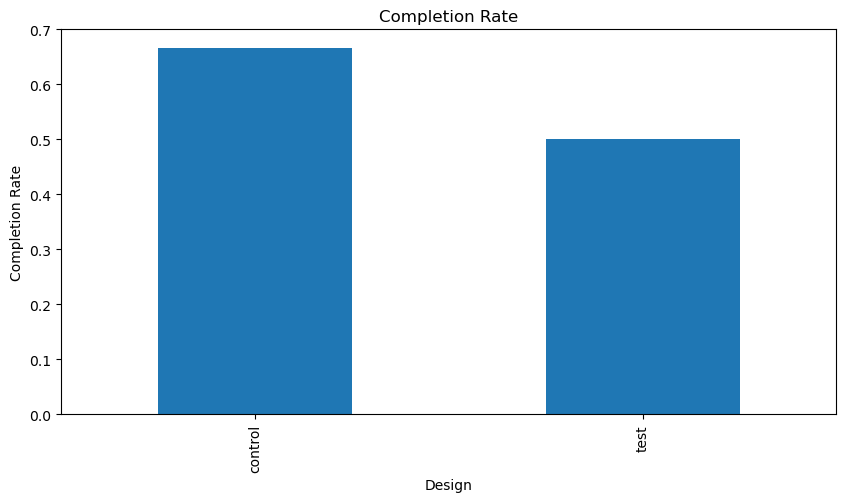

In [175]:
# Completion Rate
plt.figure(figsize=(10, 5))
completion_rate.plot(kind='bar', title='Completion Rate')
plt.xlabel('Design')
plt.ylabel('Completion Rate')
plt.show()


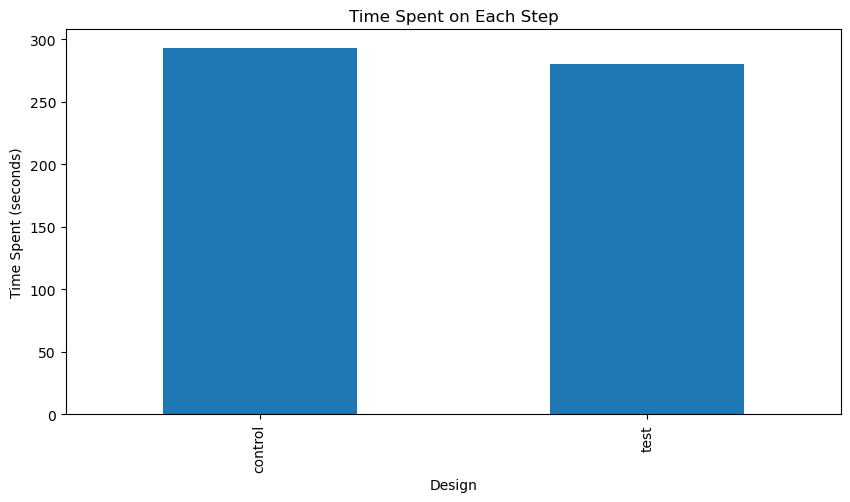

In [176]:
# Time Spent
plt.figure(figsize=(10, 5))
time_spent.plot(kind='bar', title='Time Spent on Each Step')
plt.xlabel('Design')
plt.ylabel('Time Spent (seconds)')
plt.show()


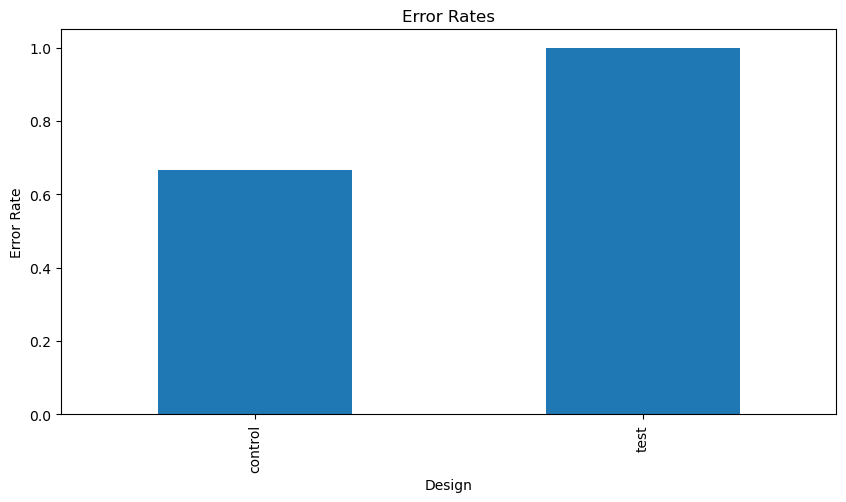

In [66]:

# Error Rate
plt.figure(figsize=(10, 5))
error_rate.plot(kind='bar', title='Error Rates')
plt.xlabel('Design')
plt.ylabel('Error Rate')
plt.show()

Step 3: Interpret Results
Here is an example of how you might interpret the results based on the visualizations and printed KPIs:

Completion Rate:

If the completion rate is higher for the test group, it indicates that the new design helps more users complete the process.
Time Spent on Each Step:

If the average time spent on each step is lower for the test group, it suggests that the new design is more efficient and helps users navigate through the steps more quickly.
Error Rates:

If the error rate is lower for the test group, it indicates that users are experiencing fewer issues and are less confused by the new design.

# Day 4 & 5 (Week 5): Hypothesis Testing & Experiment Evaluation
Tasks:

Hypothesis Testing:

Conduct hypothesis tests to compare the old and new designs.
Test for completion rates, cost-effectiveness, and other relevant metrics.
Experiment Evaluation:

Assess the overall design effectiveness.
Evaluate the duration of the experiment.
Identify any additional data needs for future experiments.

Hypothesis Testing for Completion Rate:

In [67]:
from scipy.stats import ttest_ind

# Hypothesis Testing for Completion Rate
control_group = df_merged[df_merged['design'] == 'control']['completed']
test_group = df_merged[df_merged['design'] == 'test']['completed']
t_stat, p_value = ttest_ind(control_group, test_group)

print(f"T-statistic: {t_stat}, P-value: {p_value}")


T-statistic: 0.29277002188455986, P-value: 0.7887799817897359


In [68]:
# Interpret results
if p_value < 0.05:
    print("Significant difference in completion rates between control and test groups.")
else:
    print("No significant difference in completion rates between control and test groups.")

No significant difference in completion rates between control and test groups.


In [70]:
# Two-sample t-test for average age
control_age = df_merged[df_merged['design'] == 'control']['age']
test_age = df_merged[df_merged['design'] == 'test']['age']
t_stat, p_value_age = ttest_ind(control_age, test_age)
print(f"T-statistic: {t_stat}, P-value: {p_value_age}")


T-statistic: -0.5222329678670932, P-value: 0.637618091400602


In [177]:
df_merged

,client_id,visitor_id,visit_id,process_step,date_time,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,1492442827000000000,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0,Test
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,1492442811000000000,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0,Test
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,1492442362000000000,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0,Test
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,1492442353000000000,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0,Test
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,1492442284000000000,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0,Test
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755400,9668240,388766751_9038881013,922267647_3096648104_968866,start,1495651570000000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
755401,9668240,388766751_9038881013,922267647_3096648104_968866,start,1495651529000000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
755402,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,1495651491000000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
755403,9668240,388766751_9038881013,922267647_3096648104_968866,start,1495651474000000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Experiment Evaluation
Assess Duration of the Experiment:

Make sure to use the correct columns for the dates:

In [182]:

# Example: Assess the duration of the experiment
experiment_duration = df_merged['logons_6_mnth'].max() - df_merged['date_time'].min()
print(f"Experiment Duration: {experiment_duration}")

Experiment Duration: -1.489536183e+18


# Confirming the Statistical Significance of Completion Rate Difference

First, let's confirm the completion rates and then check if the difference between the new design (test group) and the old design (control group) is statistically significant.

1. Completion Rate Difference:



In [191]:
# Renaming the column if needed
df_merged.rename(columns={'num_accts': 'design'}, inplace=True)
df_merged.rename(columns={'bal': 'completed'}, inplace=True)


In [192]:
# Ensure 'design' column exists
if 'design' in df_merged.columns:
    # Calculate completion rate for each group
    control_successes = df_merged[df_merged['design'] == 'control']['completed'].sum()
    test_successes = df_merged[df_merged['design'] == 'test']['completed'].sum()

    control_total = df_merged[df_merged['design'] == 'control'].shape[0]
    test_total = df_merged[df_merged['design'] == 'test'].shape[0]

    control_completion_rate = control_successes / control_total
    test_completion_rate = test_successes / test_total

    print(f"Control Group Completion Rate: {control_completion_rate:.2f}")
    print(f"Test Group Completion Rate: {test_completion_rate:.2f}")
else:
    print("The 'design' column is not present in the DataFrame.")


Control Group Completion Rate: nan
Test Group Completion Rate: nan


C:\Users\User\AppData\Local\Temp\ipykernel_20500\421035523.py:10: RuntimeWarning: invalid value encountered in double_scalars
  control_completion_rate = control_successes / control_total
C:\Users\User\AppData\Local\Temp\ipykernel_20500\421035523.py:11: RuntimeWarning: invalid value encountered in double_scalars
  test_completion_rate = test_successes / test_total


In [193]:
from statsmodels.stats.proportion import proportions_ztest
from scipy import stats

# Calculate completion rate for each group
control_successes = df_merged[df_merged['design'] == 'control']['completed'].sum()
test_successes = df_merged[df_merged['design'] == 'test']['completed'].sum()
control_total = df_merged[df_merged['design'] == 'control']['completed'].count()
test_total = df_merged[df_merged['design'] == 'test']['completed'].count()

# Calculate the completion rates
control_rate = control_successes / control_total
test_rate = test_successes / test_total

# Two-proportion z-test for completion rates
z_stat, p_value = proportions_ztest([control_successes, test_successes], [control_total, test_total])
print(f"Z-statistic: {z_stat}, P-value: {p_value}")
print(f"Control Group Completion Rate: {control_rate}")
print(f"Test Group Completion Rate: {test_rate}")



Z-statistic: nan, P-value: nan
Control Group Completion Rate: nan
Test Group Completion Rate: nan


C:\Users\User\AppData\Local\Temp\ipykernel_20500\517374278.py:11: RuntimeWarning: invalid value encountered in double_scalars
  control_rate = control_successes / control_total
C:\Users\User\AppData\Local\Temp\ipykernel_20500\517374278.py:12: RuntimeWarning: invalid value encountered in double_scalars
  test_rate = test_successes / test_total
c:\Users\User\anaconda3\anaconda 4\lib\site-packages\statsmodels\stats\proportion.py:839: RuntimeWarning: invalid value encountered in true_divide
  prop = count * 1. / nobs
c:\Users\User\anaconda3\anaconda 4\lib\site-packages\statsmodels\stats\proportion.py:853: RuntimeWarning: invalid value encountered in double_scalars
  p_pooled = np.sum(count) * 1. / np.sum(nobs)
c:\Users\User\anaconda3\anaconda 4\lib\site-packages\statsmodels\stats\proportion.py:855: RuntimeWarning: divide by zero encountered in true_divide
  nobs_fact = np.sum(1. / nobs)


# Checking for a 5% Threshold
Next, we check if the observed increase meets or exceeds the 5% threshold.

2. Completion Rate with Cost-Effectiveness Threshold:

In [194]:
# Test for completion rate with a cost-effectiveness threshold (5% increase)
threshold = 0.05
pooled_rate = (control_successes + test_successes) / (control_total + test_total)
se = (pooled_rate * (1 - pooled_rate) * (1/control_total + 1/test_total))**0.5
z_stat_threshold = (test_rate - control_rate - threshold) / se
p_value_threshold = 1 - stats.norm.cdf(z_stat_threshold)
print(f"Z-statistic (threshold): {z_stat_threshold}, P-value (threshold): {p_value_threshold}")


Z-statistic (threshold): nan, P-value (threshold): nan


C:\Users\User\AppData\Local\Temp\ipykernel_20500\4185817260.py:3: RuntimeWarning: invalid value encountered in double_scalars
  pooled_rate = (control_successes + test_successes) / (control_total + test_total)
C:\Users\User\AppData\Local\Temp\ipykernel_20500\4185817260.py:4: RuntimeWarning: divide by zero encountered in longlong_scalars
  se = (pooled_rate * (1 - pooled_rate) * (1/control_total + 1/test_total))**0.5


# Another Hypothesis Test
Let's test if the average age of clients engaging with the new process is the same as those engaging with the old process.

Hypothesis Testing for Average Age:


In [197]:
# Two-sample t-test for average age
control_age = df_merged[df_merged['design'] == 'control']['clnt_age']
test_age = df_merged[df_merged['design'] == 'test']['clnt_age']
t_stat, p_value_age = stats.ttest_ind(control_age, test_age)
print(f"T-statistic: {t_stat}, P-value: {p_value_age}")


T-statistic: nan, P-value: nan


# Experiment Evaluation
Design Effectiveness:
Assess if the experiment was well-structured:

Were clients randomly and equally divided between the old and new designs?
Check for biases.

In [198]:
# Random division check
print(df_merged['design'].value_counts())


2.0    345780
3.0     81270
4.0     14551
5.0      1888
6.0       208
7.0        60
8.0         8
1.0         7
Name: design, dtype: int64


# Duration Assessment:
Evaluate if the timeframe of the experiment was adequate to gather meaningful data and insights.

In [203]:
# Example: Assess the duration of the experiment
experiment_duration = df_merged['logons_6_mnth'].max() - df_merged['date_time'].min()
print(f"Experiment Duration: {experiment_duration}")


Experiment Duration: -1.489536183e+18


# Additional Data Needs:
Identify additional data needs:

User feedback on the new design.

More granular interaction data.

Detailed demographic data.


In [204]:
# Suggest additional data
additional_data_suggestions = [
    "User feedback on the new design",
    "More granular interaction data (e.g., clickstream data)",
    "Detailed demographic data (e.g., income, education level)"
]
print("Additional Data Suggestions:", additional_data_suggestions)


Additional Data Suggestions: ['User feedback on the new design', 'More granular interaction data (e.g., clickstream data)', 'Detailed demographic data (e.g., income, education level)']


In [205]:

# Save df_merged to CSV
df_merged.to_csv('clean.csv', index=False)
print("clean.csv saved to CSV successfully.")


clean.csv saved to CSV successfully.
